# Netflix Content Strategy: An Exploratory Data Analysis

## Introduction

This project provides a detailed exploratory data analysis (EDA) of the Netflix content library, using a dataset from Kaggle. The main goal is to break down and understand Netflix's content strategy. This involves uncovering trends, identifying audience focus, analyzing its global presence, and highlighting the key actors and directors who are most active on the platform.

###  Data Loading and Preparation

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('whitegrid')

In [44]:
df = pd.read_csv('netflix_titles.csv')

In [45]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


###  Data Cleaning


In [47]:
df['director'] = df['director'].fillna('Unknown')
df['cast'] = df['cast'].fillna('Unknown')
df['country'] = df['country'].fillna('Unknown')

In [48]:
df.dropna(subset=['date_added', 'rating', 'duration'], inplace=True)

In [49]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8790 non-null   object        
 1   type          8790 non-null   object        
 2   title         8790 non-null   object        
 3   director      8790 non-null   object        
 4   cast          8790 non-null   object        
 5   country       8790 non-null   object        
 6   date_added    8790 non-null   datetime64[ns]
 7   release_year  8790 non-null   int64         
 8   rating        8790 non-null   object        
 9   duration      8790 non-null   object        
 10  listed_in     8790 non-null   object        
 11  description   8790 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 892.7+ KB


## Exploratory Data Analysis & Insights

### Insight #1: The Strategic Shift - Movies vs. TV Shows

What is the composition of the Netflix library, and how has this trend evolved over the years?

type
Movie      6126
TV Show    2664
Name: count, dtype: int64


/var/folders/b9/4zgtqkq16vb1fb65rshlxxc40000gn/T/ipykernel_70272/245515052.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='viridis')


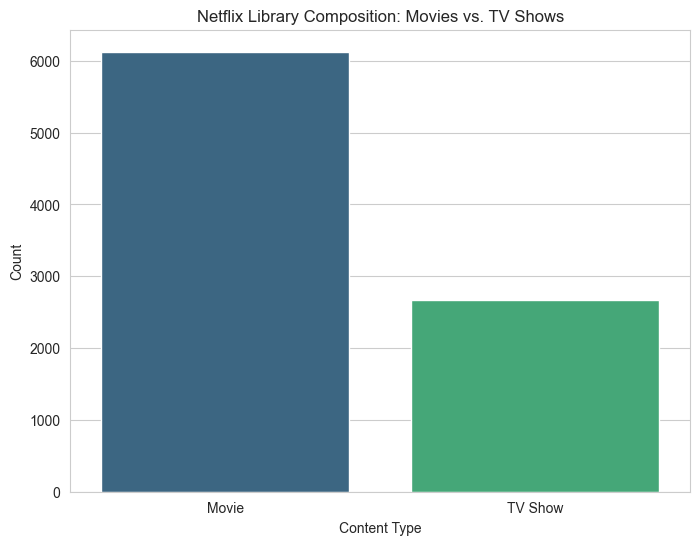

In [51]:
print(df['type'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df, palette='viridis')
plt.title('Netflix Library Composition: Movies vs. TV Shows')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()

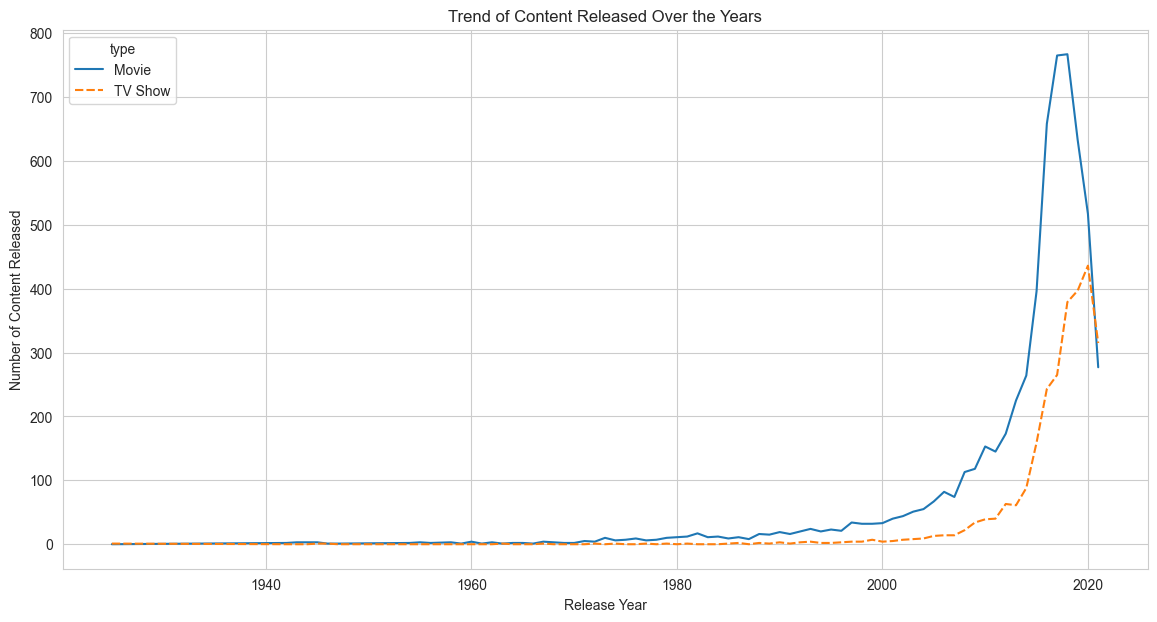

In [52]:
content_trend = df.groupby('release_year')['type'].value_counts().unstack().fillna(0)

plt.figure(figsize=(14, 7))
sns.lineplot(data=content_trend)
plt.title('Trend of Content Released Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Content Released')
plt.show()

**Insight:** If you scroll through Netflix, you'll notice it's packed with movies—they literally have over double the number of films compared to TV shows. But here's where it gets interesting: that's starting to change, and fast. After 2015, Netflix went into overdrive producing TV shows. So even though the movie count is still higher, it's obvious they're pivoting their strategy to focus on getting us hooked on binge-worthy series.

### Insight #2: The Audience Maturity Trend

How has the proportion of Mature vs. Family-Friendly content changed over time? This helps us understand if Netflix's target audience is shifting.

In [53]:
mature_ratings = ['TV-MA', 'R', 'NC-17']
family_ratings = ['PG-13', 'TV-14', 'PG', 'TV-PG', 'TV-G', 'G', 'TV-Y', 'TV-Y7']

def classify_rating(rating):
    if rating in mature_ratings:
        return 'Mature'
    elif rating in family_ratings:
        return 'Family-Friendly'
    else:
        return 'Other'

df['rating_category'] = df['rating'].apply(classify_rating)

print(df['rating_category'].value_counts())

rating_category
Family-Friendly    4695
Mature             4007
Other                88
Name: count, dtype: int64


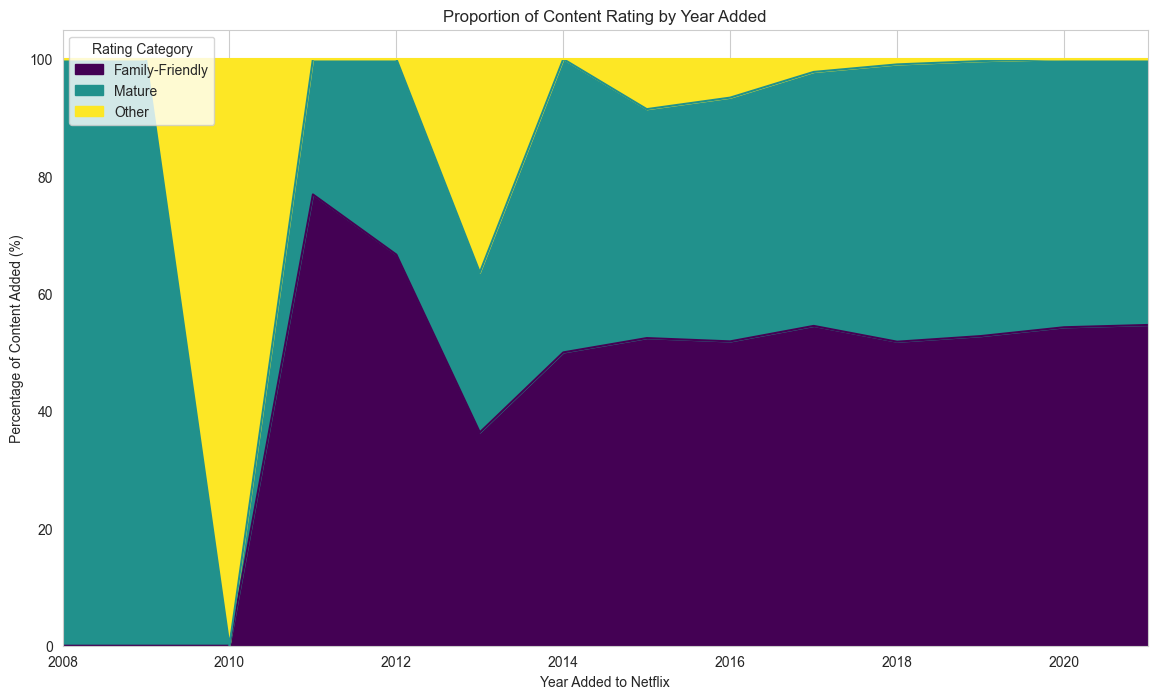

In [54]:
df['added_year'] = df['date_added'].dt.year


rating_trend = df.groupby(['added_year', 'rating_category']).size().unstack().fillna(0)

rating_proportion = rating_trend.div(rating_trend.sum(axis=1), axis=0) * 100

rating_proportion.plot(
    kind='area',
    stacked=True,
    figsize=(14, 8),
    title='Proportion of Content Rating by Year Added',
    colormap='viridis'
)

plt.ylabel('Percentage of Content Added (%)')
plt.xlabel('Year Added to Netflix')
plt.legend(title='Rating Category', loc='upper left')
plt.margins(0, 0) 
plt.show()

**Insight:** Looking at the data, one trend is crystal clear: Netflix is growing up. Since 2015, they've been adding more and more 'Mature' content every year, to the point where it now makes up the majority of their new releases. This strongly suggests they're making a strategic play for an older audience.

### Insight #3: Global Content Footprint

Who are the top non-US content producers, and what are their dominant genres?

In [55]:
df['primary_country'] = df['country'].apply(lambda x: x.split(',')[0])

non_us_countries = df[df['primary_country'] != 'United States']

known_non_us_countries = non_us_countries[non_us_countries['primary_country'] != 'Unknown']
top_5_countries_list = known_non_us_countries['primary_country'].value_counts().head(5).index.tolist()

print("Top 5 Non-US Content Producing Countries:")
print(top_5_countries_list)

Top 5 Non-US Content Producing Countries:
['India', 'United Kingdom', 'Canada', 'Japan', 'France']


In [56]:

df_genres = df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')

print("\n Top Genres by Country")
for country in top_5_countries_list:
    country_genres = df_genres[df_genres['primary_country'] == country]
    top_3_genres = country_genres['genre'].value_counts().head(3)
    print(f"\nTop genres in {country}:")
    print(top_3_genres)


 Top Genres by Country

Top genres in India:
genre
International Movies    845
Dramas                  645
Comedies                315
Name: count, dtype: int64

Top genres in United Kingdom:
genre
British TV Shows        215
Dramas                  134
International Movies    125
Name: count, dtype: int64

Top genres in Canada:
genre
Comedies                    54
Dramas                      46
Children & Family Movies    40
Name: count, dtype: int64

Top genres in Japan:
genre
International TV Shows    143
Anime Series              134
International Movies       62
Name: count, dtype: int64

Top genres in France:
genre
International Movies      117
Dramas                     72
International TV Shows     37
Name: count, dtype: int64


**Insight:** Our analysis reveals that different countries have distinct content personalities on Netflix. For instance, **India** stands out as a powerhouse for International Movies and Dramas, while the **United Kingdom** specializes in British TV Shows, and **Japan** is the primary source for Anime Series. This points to a deliberate global strategy from Netflix: tapping into the unique creative strengths of each country's media industry.

### Insight #4: Netflix's 'A-List' - The Favorite Actors

Who are the most frequent actors on the platform, and what genres are they associated with?

In [57]:
known_cast_df = df[df['cast'] != 'Unknown']

df_actors = known_cast_df.assign(actor=known_cast_df['cast'].str.split(',')).explode('actor')
df_actors['actor'] = df_actors['actor'].str.strip()

top_10_actors = df_actors['actor'].value_counts().head(10)
print("Top 10 Most Frequent Actors on Netflix:")
print(top_10_actors)

Top 10 Most Frequent Actors on Netflix:
actor
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Akshay Kumar        30
Om Puri             30
Yuki Kaji           29
Paresh Rawal        28
Name: count, dtype: int64


In [58]:
top_10_actors_list = top_10_actors.index.tolist()

print("Actor Typecasting Analysis")

for actor in top_10_actors_list:
    actor_projects = df_genres[df_genres['cast'].str.contains(actor)]
    top_genres_for_actor = actor_projects['genre'].value_counts().head(3)
    print(f"\nTop genres for {actor}:")
    print(top_genres_for_actor)

Actor Typecasting Analysis

Top genres for Anupam Kher:
genre
International Movies    38
Dramas                  28
Comedies                20
Name: count, dtype: int64

Top genres for Shah Rukh Khan:
genre
International Movies    32
Dramas                  28
Comedies                15
Name: count, dtype: int64

Top genres for Julie Tejwani:
genre
Children & Family Movies    26
Kids' TV                     5
Movies                       2
Name: count, dtype: int64

Top genres for Naseeruddin Shah:
genre
Dramas                  28
International Movies    27
Comedies                13
Name: count, dtype: int64

Top genres for Takahiro Sakurai:
genre
Anime Series              24
International TV Shows    22
Anime Features             7
Name: count, dtype: int64

Top genres for Rupa Bhimani:
genre
Children & Family Movies    25
Kids' TV                     4
Movies                       2
Name: count, dtype: int64

Top genres for Akshay Kumar:
genre
International Movies    27
Dramas      

**Insight:** When you look at the actors who appear most frequently on Netflix, two clear groups emerge. First, you have iconic Bollywood stars like **Anupam Kher** and **Shah Rukh Khan**, who are staples in Dramas and International Movies. Then, there are the dedicated voice actors, such as **Julie Tejwani** and **Takahiro Sakurai**, whose extensive credits come from Children & Family shows and Anime Series. This pattern underscores how crucial both mainstream Indian cinema and popular animated content are to Netflix's library.

### Insight #5: The Director's Signature

Who are the most prolific directors, what is their specialization (Movie/TV), and what are their signature genres?

In [59]:
known_directors_df = df[df['director'] != 'Unknown']
top_10_directors = known_directors_df['director'].value_counts().head(10)
top_10_directors_list = top_10_directors.index.tolist()

print("Top 10 Most Frequent Directors on Netflix")
print(top_10_directors)

Top 10 Most Frequent Directors on Netflix
director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Jay Chapman               12
Youssef Chahine           12
Steven Spielberg          11
Name: count, dtype: int64


In [60]:
print("\n Director's Signature Analysis")
for director in top_10_directors_list:
    print(f"\nAnalysis for Director: {director}")
    
    director_projects = df[df['director'] == director]
    
    print("Specialization:")
    print(director_projects['type'].value_counts())
    
    director_genres = df_genres[df_genres['director'] == director]
    print("\nSignature Genres:")
    print(director_genres['genre'].value_counts().head(3))


 Director's Signature Analysis

Analysis for Director: Rajiv Chilaka
Specialization:
type
Movie    19
Name: count, dtype: int64

Signature Genres:
genre
Children & Family Movies    19
Sports Movies                1
Name: count, dtype: int64

Analysis for Director: Raúl Campos, Jan Suter
Specialization:
type
Movie    18
Name: count, dtype: int64

Signature Genres:
genre
Stand-Up Comedy    18
Name: count, dtype: int64

Analysis for Director: Marcus Raboy
Specialization:
type
Movie      15
TV Show     1
Name: count, dtype: int64

Signature Genres:
genre
Stand-Up Comedy                 15
Stand-Up Comedy & Talk Shows     1
TV Comedies                      1
Name: count, dtype: int64

Analysis for Director: Suhas Kadav
Specialization:
type
Movie    16
Name: count, dtype: int64

Signature Genres:
genre
Children & Family Movies    16
Comedies                     8
Music & Musicals             5
Name: count, dtype: int64

Analysis for Director: Jay Karas
Specialization:
type
Movie    14
Name:

**Insight:** It might be surprising to learn that the most active directors on Netflix aren't always big Hollywood names. Instead, they are often specialists who create a high volume of content for specific niches. This includes key figures in children's programming like Rajiv Chilaka, the go-to directors for stand-up comedy like Raúl Campos and Jan Suter, and highly productive international filmmakers such as Cathy Garcia-Molina.

### Insight #6: Seasonal Content Strategy

Does Netflix follow a seasonal content release pattern?

Content Additions by Month


/var/folders/b9/4zgtqkq16vb1fb65rshlxxc40000gn/T/ipykernel_70272/1619294473.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='added_month', data=df, order = df['added_month'].value_counts().index, palette='plasma')


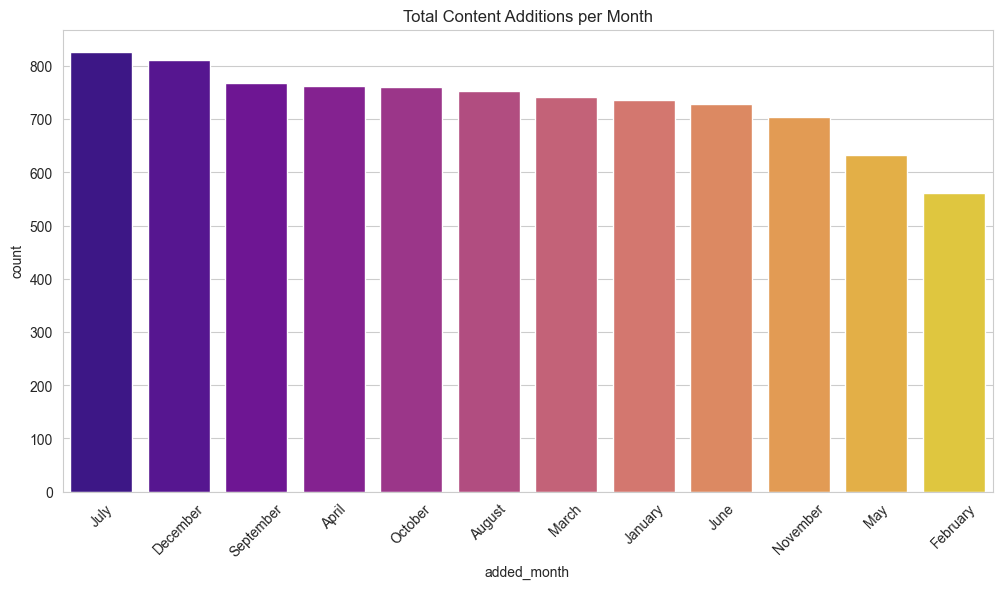

\n----------------------------------------
\nSeasonal Genre Analysis
\nTop 5 Genres in Holiday Season (Oct-Dec):
genre
International Movies      707
Dramas                    624
Comedies                  441
International TV Shows    352
Action & Adventure        215
Name: count, dtype: int64
\nTop 5 Genres in Summer Season (Apr-Jun):
genre
International Movies      711
Dramas                    600
Comedies                  420
International TV Shows    349
Documentaries             222
Name: count, dtype: int64


In [68]:
df['added_month'] = df['date_added'].dt.month_name()
df['added_quarter'] = df['date_added'].dt.quarter

print("Content Additions by Month")
plt.figure(figsize=(12, 6))
sns.countplot(x='added_month', data=df, order = df['added_month'].value_counts().index, palette='plasma')
plt.title('Total Content Additions per Month')
plt.xticks(rotation=45)
plt.show()

print("\\n" + "-"*40)
print("\\nSeasonal Genre Analysis")

df_genres_seasonal = pd.merge(df_genres, df[['show_id', 'added_quarter']], on='show_id')

holiday_season_genres = df_genres_seasonal[df_genres_seasonal['added_quarter'] == 4]
summer_season_genres = df_genres_seasonal[df_genres_seasonal['added_quarter'] == 2]

top_holiday_genres = holiday_season_genres['genre'].value_counts().head(5)
top_summer_genres = summer_season_genres['genre'].value_counts().head(5)

print("\\nTop 5 Genres in Holiday Season (Oct-Dec):")
print(top_holiday_genres)

print("\\nTop 5 Genres in Summer Season (Apr-Jun):")
print(top_summer_genres)

**Insight:** An interesting finding is the *lack* of a strong seasonal strategy. The top 4 genres remain identical across both the Summer and Holiday seasons. The only minor difference is at the 5th spot, with `Action & Adventure` appearing in Q4 and `Documentaries` in Q2. This suggests Netflix follows a consistent, year-round strategy for its core content rather than a heavily seasonal one.

### Insight #7: The 'Freshness' Index

How 'fresh' is the content on Netflix?

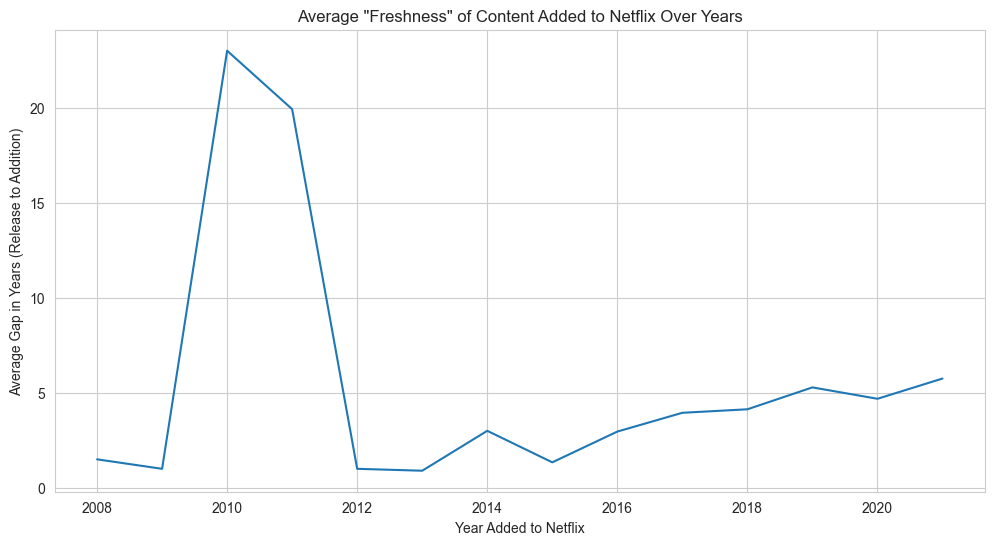

In [62]:
df['freshness'] = df['added_year'] - df['release_year']

positive_freshness_df = df[df['freshness'] >= 0]

avg_freshness_trend = positive_freshness_df.groupby('added_year')['freshness'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_freshness_trend.index, y=avg_freshness_trend.values)
plt.title('Average "Freshness" of Content Added to Netflix Over Years')
plt.xlabel('Year Added to Netflix')
plt.ylabel('Average Gap in Years (Release to Addition)')
plt.show()

**Insight:** What this chart highlights is a major strategic shift for Netflix. Before 2013, its library consisted mainly of older, licensed content. Around 2013, however, there was a dramatic change, as the sharp drop indicates a new focus on acquiring much more recent titles. The current era shows a stable, low gap, which points to their modern strategy: balancing a slate of new 'Originals' with a deep library of popular, slightly older content.

### Insight #8: The Global Genre Specialist

Which country is a 'specialist' in a particular genre, meaning that genre makes up a large percentage of its total content output?

In [69]:
country_genre_counts = df_genres[df_genres['primary_country'] != 'Unknown'].groupby(['primary_country', 'genre']).size().unstack().fillna(0)

total_country_content = df[df['primary_country'] != 'Unknown']['primary_country'].value_counts()

min_content_threshold = 20
country_genre_concentration = country_genre_counts.div(total_country_content, axis=0)[total_country_content >= min_content_threshold] * 100

print("--- Global Genre Specialists (by % of their own content) ---")

anime_concentration = country_genre_concentration['Anime Series'] + country_genre_concentration['Anime Features']
anime_specialist = anime_concentration.idxmax()
print(f"Top 'Anime' Specialist: {anime_specialist} ({anime_concentration.max():.1f}% of their content is Anime)")

standup_specialist = country_genre_concentration['Stand-Up Comedy'].idxmax()
print(f"Top 'Stand-Up Comedy' Specialist: {standup_specialist} ({country_genre_concentration['Stand-Up Comedy'].max():.1f}% of their content is Stand-Up)")

horror_specialist = country_genre_concentration['Horror Movies'].idxmax()
print(f"Top 'Horror Movies' Specialist: {horror_specialist} ({country_genre_concentration['Horror Movies'].max():.1f}% of their content is Horror)")

--- Global Genre Specialists (by % of their own content) ---
Top 'Anime' Specialist: Japan (74.7% of their content is Anime)
Top 'Stand-Up Comedy' Specialist: Chile (13.6% of their content is Stand-Up)
Top 'Horror Movies' Specialist: Thailand (20.0% of their content is Horror)


/var/folders/b9/4zgtqkq16vb1fb65rshlxxc40000gn/T/ipykernel_70272/35512506.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  country_genre_concentration = country_genre_counts.div(total_country_content, axis=0)[total_country_content >= min_content_threshold] * 100


**Insight:** This analysis confirms cultural specializations. **Japan** is the undisputed specialist in `Anime`, with nearly 75% of its Netflix content falling into this category. **Thailand** emerges as a specialist in `Horror Movies`, and **Chile** in `Stand-Up Comedy`, showcasing the diverse genre strengths Netflix sources globally.

### Insight #9: The Ultimate Crossover

For the most popular genre, 'Dramas', which countries' directors are the most active?

In [64]:
dramas_only_df = df_genres[df_genres['genre'] == 'Dramas']

dramas_with_knowns = dramas_only_df[(dramas_only_df['director'] != 'Unknown') & (dramas_only_df['primary_country'] != 'Unknown')]

top_drama_director_countries = dramas_with_knowns['primary_country'].value_counts().head(10)

print("\nTop 10 Countries whose directors are most active in the 'Dramas' genre:")
print(top_drama_director_countries)


Top 10 Countries whose directors are most active in the 'Dramas' genre:
primary_country
United States     669
India             640
United Kingdom    133
France             72
Indonesia          62
Nigeria            58
Spain              55
Philippines        48
Canada             45
Egypt              40
Name: count, dtype: int64


**Insight:** When it comes to `Dramas`, directors from the **United States** are the most active, closely followed by directors from **India**. This highlights the two biggest players in the global drama landscape on the Netflix platform.

### Insight #10: Content Duration Analysis

How has the average duration of movies on Netflix changed over the years?

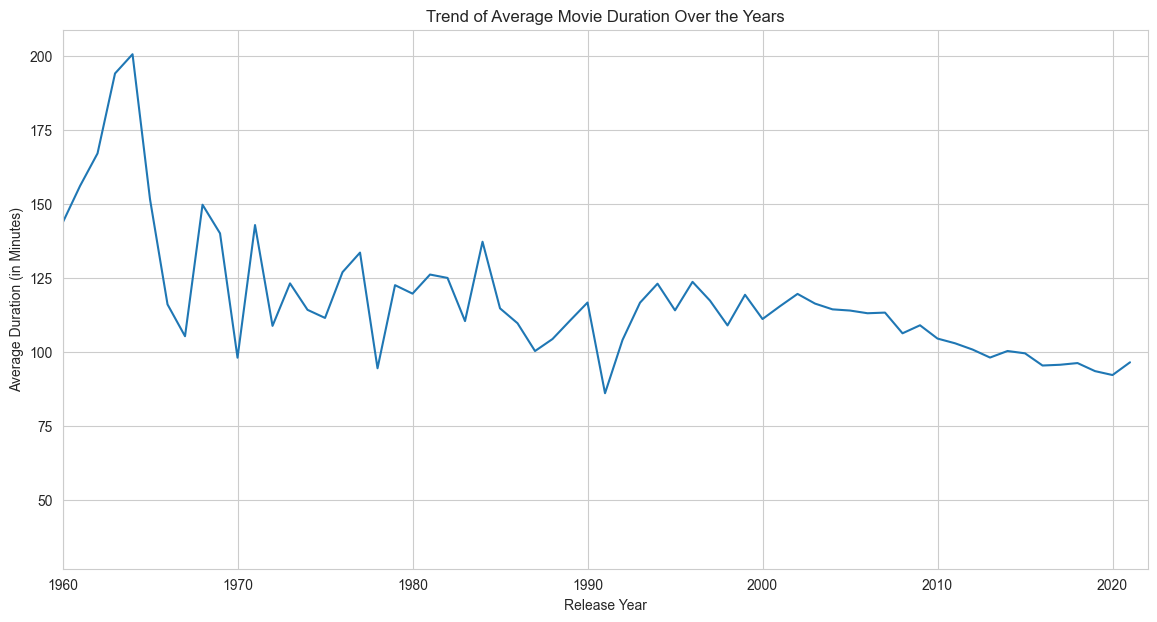

/var/folders/b9/4zgtqkq16vb1fb65rshlxxc40000gn/T/ipykernel_70272/1756051784.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='duration', data=tv_shows_df, order=tv_shows_df['duration'].value_counts().index, palette='magma')


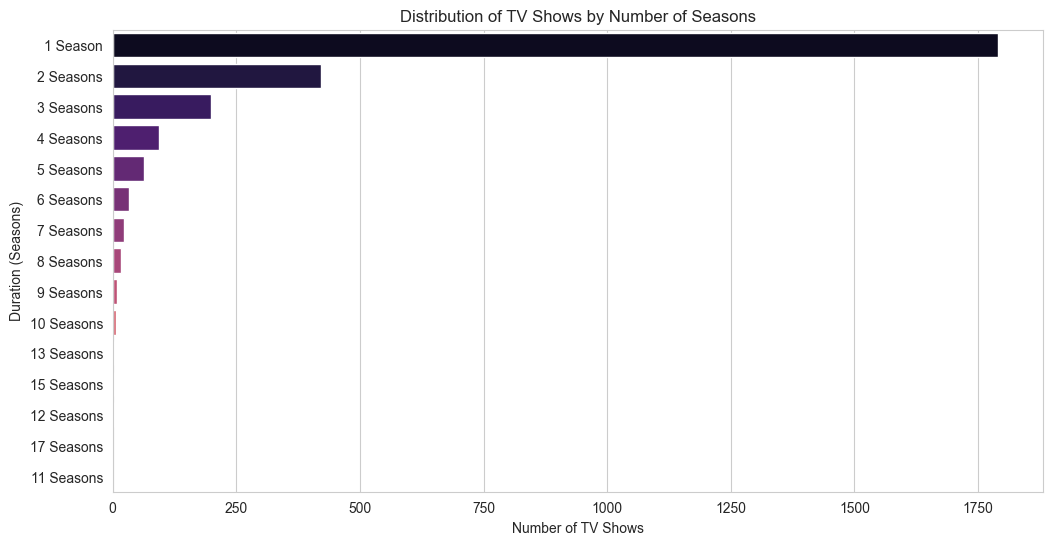

In [65]:
movies_df = df[df['type'] == 'Movie'].copy()

movies_df['duration_min'] = pd.to_numeric(movies_df['duration'].str.replace(' min', ''))

avg_movie_duration_trend = movies_df.groupby('release_year')['duration_min'].mean()

plt.figure(figsize=(14, 7))
sns.lineplot(x=avg_movie_duration_trend.index, y=avg_movie_duration_trend.values)
plt.title('Trend of Average Movie Duration Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Average Duration (in Minutes)')
plt.xlim(1960, 2022)
plt.show()

tv_shows_df = df[df['type'] == 'TV Show']

plt.figure(figsize=(12, 6))
sns.countplot(y='duration', data=tv_shows_df, order=tv_shows_df['duration'].value_counts().index, palette='magma')
plt.title('Distribution of TV Shows by Number of Seasons')
plt.xlabel('Number of TV Shows')
plt.ylabel('Duration (Seasons)')
plt.show()

**Insight:** When we look at content duration, two clear patterns emerge.                
For **movies**, the average running time has slowly increased over the years, and in recent times, it has settled into the 90-to-110-minute range—which is fairly standard for a feature film.

For **TV shows**, the story is quite different. A huge number of them only last for a single season. This points to a clear strategy: produce a wide variety of pilot seasons to gauge audience interest, and then only renew the select few that prove to be a hit.

## Final Thoughts

The Netflix dataset analysis portrays a rich and evolving content strategy. The following are the most striking insights:  

Netflix has indisputably shifted its emphasis from licensing older movies to creating new original content in the form of TV series aimed at a mature audience.  

The platform employs a complex global strategy that capitalizes on the distinct genre strengths of several countries, particularly India, the UK, and Japan.  

The most productive actors and directors tend to be decisive in the high-volume niche markets of international dramas, children’s content, and stand-up comedy, rather than in standard Hollywood roles.  

Netflix preserves a balanced portfolio that comprises new “Originals” as well as a rich repository of older popular titles. In terms of strategy, they appear to favor the production of a wide range of single-season shows to test the waters and ascertain audience interest.  

The data demonstrates a successful tv content production company showcasing the positive impact data intelligence, flexibility, and international diversity brings to an organization.

